In [19]:

import os
# from shutil import rmtreepip
import argparse
import random
import pandas as pd

from scipy import interpolate

import numpy as np

import matplotlib.pyplot as plt
import soundfile as sf
# import librosa
import pyworld as pw
import math
from pylab import *

parser = argparse.ArgumentParser()
parser.add_argument("-f", "--frame_period", type=float, default=5.0)
parser.add_argument("-s", "--speed", type=int, default=1)


EPSILON = 1e-8


In [3]:
local_path = '/Users/Zizy/Programming/HKU/Dissertation/Python-Wrapper-for-World-Vocoder/demo/'

x, fs = sf.read(local_path+'songs/nitech_jp_song070_f001_003.raw', endian='LITTLE', channels=1, samplerate=48000,
                subtype='PCM_16')
# x, fs = sf.read('utterance/test.wav')
# x, fs = librosa.load('utterance/vaiueo2d.wav', dtype=np.float64)
print(len(x))

# 1. A convient way
f0, sp, ap = pw.wav2world(x, fs)  # use default options


1497597


In [20]:
sp2 = np.log(sp)
sp2 = np.round(sp2)
sp2 = np.exp(sp2)
sp2 = np.array([i if index % 50 == 0 else sp2[int(index-index%50)] for index, i in enumerate(sp2) ])




In [8]:
def savefig(filename, figlist, log=True):
    # h = 10
    n = len(figlist)
    # peek into instances
    f = figlist[0]
    if len(f.shape) == 1:
        plt.figure()
        for i, f in enumerate(figlist):
            plt.subplot(n, 1, i + 1)
            if len(f.shape) == 1:
                plt.plot(f)
                plt.xlim([0, len(f)])
    elif len(f.shape) == 2:
        Nsmp, dim = figlist[0].shape
        # figsize=(h * float(Nsmp) / dim, len(figlist) * h)
        # plt.figure(figsize=figsize)
        plt.figure()
        for i, f in enumerate(figlist):
            plt.subplot(n, 1, i + 1)
            if log:
                x = np.log(f + EPSILON)
            else:
                x = f + EPSILON
            plt.imshow(x.T, origin='lower', interpolation='none', aspect='auto', extent=(0, x.shape[0], 0, x.shape[1]))
    else:
        raise ValueError('Input dimension must < 3.')
    plt.savefig(filename)


In [ ]:


# sp = np.array([i if index % 10 == 0 else sp[index-1] for index, i in enumerate(sp) ])
y = pw.synthesize(f0, sp2, ap, fs, pw.default_frame_period)
sf.write(local_path+'test/convient_way_sample_20.wav', y, fs)


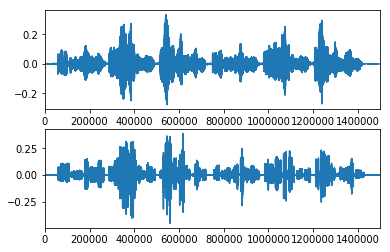

In [11]:
savefig(local_path+'test/wavform.png', [x, y])

In [29]:
def status(x):
        return pd.Series([x.count(), x.min(), x.idxmin(), x.quantile(.25), x.median(),
                          x.quantile(.75), x.mean(), x.max(), x.idxmax(), x.mad(), x.var(),
                          x.std(), x.skew(), x.kurt()], index=['总数', '最小值', '最小值位置', '25%分位数',
                                                               '中位数', '75%分位数', '均值', '最大值', '最大值位数', '平均绝对偏差', '方差',
                                                               '标准差', '偏度', '峰度'])
 status(series)

总数        6.396000e+06
最小值      -2.792641e+01
最小值位置     3.092424e+06
25%分位数   -2.003242e+01
中位数      -1.765979e+01
75%分位数   -1.409981e+01
均值       -1.657828e+01
最大值       3.286869e-01
最大值位数     4.587957e+06
平均绝对偏差    3.576394e+00
方差        2.038423e+01
标准差       4.514890e+00
偏度        1.059625e+00
峰度        7.863350e-01
dtype: float64

In [74]:
series_2 = [i for index,i in enumerate(series)if index%4==0]

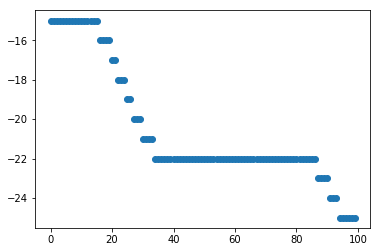

In [12]:
plt.scatter(range(0,100),np.log(sp2[0][0:100]))

10200


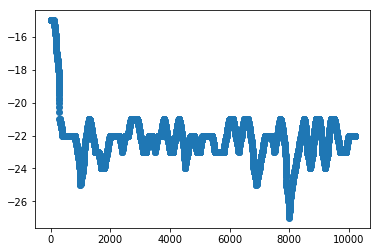

In [100]:
sp2 = np.log(sp[0])
sp2 = np.round(sp2)
sp2 = np.exp(sp2)
sp2 = np.array([i for index, i in enumerate(sp2) if index % 10 == 0])
f = interpolate.interp1d(np.array(range(0, len(sp2))), sp2, kind='slinear')
sp2 = f(np.divide(range(0,len(sp2)*100-100),100))
print(len(sp2))
plt.scatter(range(0,len(sp2)),np.log(sp2))


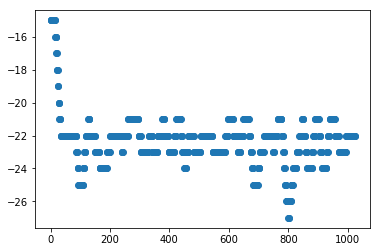

In [109]:
sp2 = np.log(sp[0])
sp2 = np.round(sp2)
sp2 = np.exp(sp2)
# sp2 = np.array([i for index, i in enumerate(sp2) if index % 10 == 0])
plt.scatter(range(0,len(sp2)),np.log(sp2))
# plt.plot(np.log(sp2))

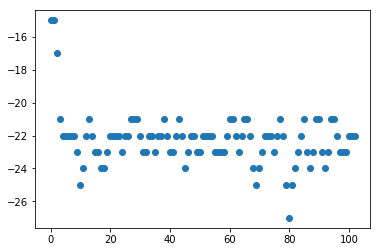

In [110]:
sp2 = np.log(sp[0])
sp2 = np.round(sp2)
sp2 = np.exp(sp2)
sp2 = np.array([i for index, i in enumerate(sp2) if index % 10 == 0])
plt.scatter(range(0,len(sp2)),np.log(sp2))
# plt.plot(np.log(sp2))

In [95]:
sp2= np.zeros((sp.shape[0],sp.shape[1]))
for sp_i in range(0,len(sp)):
    if sp_i%2000 ==0:
        print("%s/%s"%(sp_i,len(sp)))
    sp_new = np.log(sp[sp_i])
    sp_new = np.round(sp_new)
    sp_new = np.exp(sp_new)
    sp_new = np.array([i if index % 10 == 0 else sp_new[int(index-index%10)] for index, i in enumerate(sp_new) ])
    sp2[sp_i] = sp_new
y = pw.synthesize(f0, sp2, ap, fs, pw.default_frame_period)
sf.write(local_path+'test/convient_way_sample_10.wav', y, fs)

0/6240


2000/6240


4000/6240


6000/6240


0/6240


2000/6240


4000/6240


6000/6240


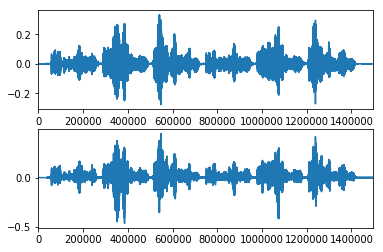

In [17]:
sp3= np.zeros((sp.shape[0],sp.shape[1]))
for sp_i in range(0,len(sp3)):
    if sp_i%2000 ==0:
        print("%s/%s"%(sp_i,len(sp)))
    sp_new = np.log(sp[sp_i])
    sp_new = np.round(sp_new)
    sp_new = np.exp(sp_new)
    sp_new = np.array([i for index, i in enumerate(sp_new) if index % 20 == 0 ])
    f = interpolate.interp1d(np.array(range(0, len(sp_new))), sp_new, kind='slinear')
    sp_new = f(np.arange(0,len(sp_new)-1,(len(sp_new)-1)/1025))
    # sp_new = np.hstack([sp_new,np.zeros((5))])
    sp3[sp_i]=sp_new
y = pw.synthesize(f0, sp3, ap, fs, pw.default_frame_period)
sf.write(local_path+'test/convient_way_sample_100_inter.wav', y, fs)
savefig(local_path+'test/fig.png',[x,y])

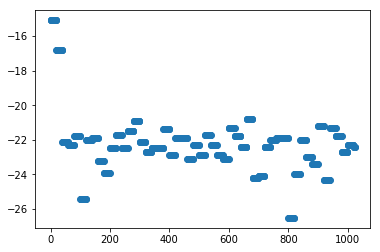

In [72]:
plt.scatter(range(0,len(np.log(sp2[0]))),np.log(sp2[0]))

/Users/Zizy/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


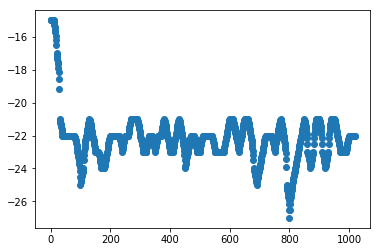

In [146]:
plt.scatter(range(0,len(np.log(sp3[0]))),np.log(sp3[0]))

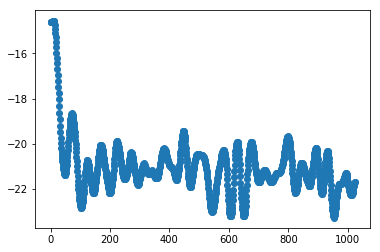

In [82]:
plt.scatter(range(0,len(np.log(sp[6]))),np.log(sp[6]))

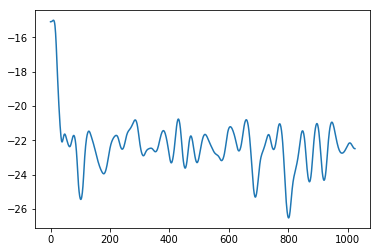

In [7]:
plt.plot(np.log(sp[0]))

/Users/Zizy/anaconda/envs/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


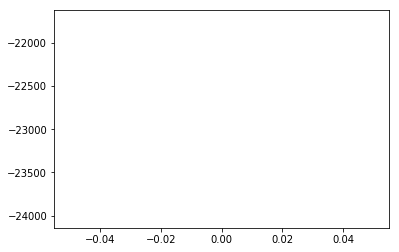

In [21]:
sp_ifft = np.log(sp[0])
sp_ifft = np.fft.fft(sp_ifft)
sp_ifft = sp_ifft[:1]
sp_ifft = np.fft.ifft(sp_ifft)
plt.plot(sp_ifft)

# y = pw.synthesize(f0, sp_ifft, ap, fs, pw.default_frame_period)
# sf.write(local_path+'test/convient_ifft_60.wav', y, fs)


/Users/Zizy/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


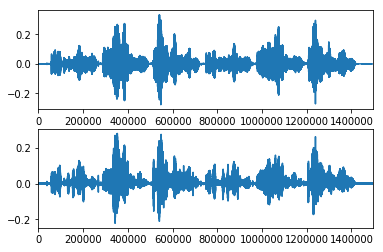

In [13]:

sp_ifft_new=np.zeros(sp.shape).astype(np.complex128)
for i in range(0,len(sp)):
    # sp_ifft = 2595 * np.log10(1+sp[i]/700)
    # sp_ifft = np.log(sp_ifft)
    sp_ifft = np.log(sp[i])
    sp_ifft = np.fft.irfft(sp_ifft)
    sp_ifft = sp_ifft[:40]
    sp_ifft = np.fft.rfft(sp_ifft)
    f = interpolate.interp1d(np.array(range(0, len(sp_ifft))), sp_ifft, kind='cubic')
    sp_ifft = f(np.arange(0,len(sp_ifft)-1,(len(sp_ifft)-1)/len(sp[i]) ))
    sp_ifft = np.exp(sp_ifft) *100
    # sp_ifft = 700*(np.power(10,sp_ifft/2595)-1)
    sp_ifft_new[i] = sp_ifft
y = pw.synthesize(f0, sp_ifft_new.astype(np.double), ap, fs, pw.default_frame_period)
sf.write(local_path+'test/fft_mel_1.wav', y, fs)
savefig(local_path+'test/fig.png',[x,y])

/Users/Zizy/anaconda/envs/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


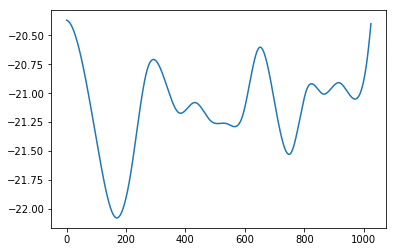

In [22]:
plt.plot(np.log(sp_ifft_new[1]))

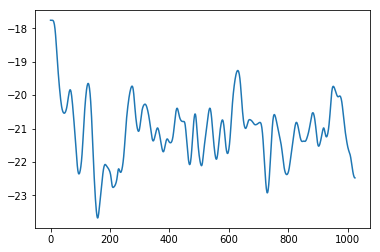

In [181]:
plt.plot(np.log(sp[1]))

<class 'numpy.complex128'>


/Users/Zizy/anaconda/envs/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


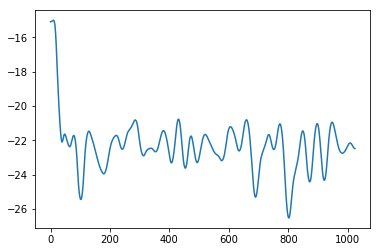

In [24]:
i=0
# sp_ifft = 2595 * np.log10(1+sp[i]/700)
# sp_ifft = np.log(sp_ifft)
sp_ifft = np.log(sp[i])
sp_ifft = np.fft.ifft(sp_ifft)
sp_ifft = sp_ifft[:1025]
sp_ifft = np.fft.fft(sp_ifft)
f = interpolate.interp1d(np.array(range(0, len(sp_ifft))), sp_ifft, kind='slinear')
sp_ifft= f(np.arange(0,len(sp_ifft)-1,(len(sp_ifft)-1)/len(sp[i]) ))
sp_ifft = np.exp(sp_ifft)
# sp_ifft = 700*(np.power(10,sp_ifft/2595)-1)
print(type(sp_ifft[0]))
plt.plot(np.log(sp_ifft))

/Users/Zizy/anaconda/envs/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


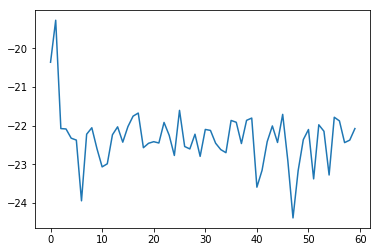

In [171]:
i=0
# sp_ifft = 2595 * np.log10(1+sp[i]/700)
sp_ifft = np.log(sp[i])
sp_ifft = np.fft.ifft(sp_ifft)
sp_ifft = sp_ifft[:60]
sp_ifft = np.fft.fft(sp_ifft)
# sp_ifft = 700*(np.power(np.e,sp_ifft/1127)-1)
plt.plot(sp_ifft)

In [102]:
sp_ifft_new[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [107]:
sp_ifft[0]

(-1.426780830759986e-09-1.6265538584359557e-10j)